## 0. Introduction


## 1. Import of libraries

In [8]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import seaborn as sns
import folium

from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans

## 2. Import of data set

In [9]:
corridor_data = pd.read_csv('C:\\Users\\vanderstraatenj\\Desktop\\Bookings_corridor_31072017.csv')
corridor_data.head(1)


,Booking ID,Origin Address,Latitude,Longitude,Node ID (pickup),District,Time range
0,35,"Filton Road, Horfield, Bristol BS7 0PF, United...",51.496929,-2.580907,A38 / Eden Grove,Filton,AM parking


## 3. Visualisation of the data

Number of bookings on the corridor since 07.2016: 6817


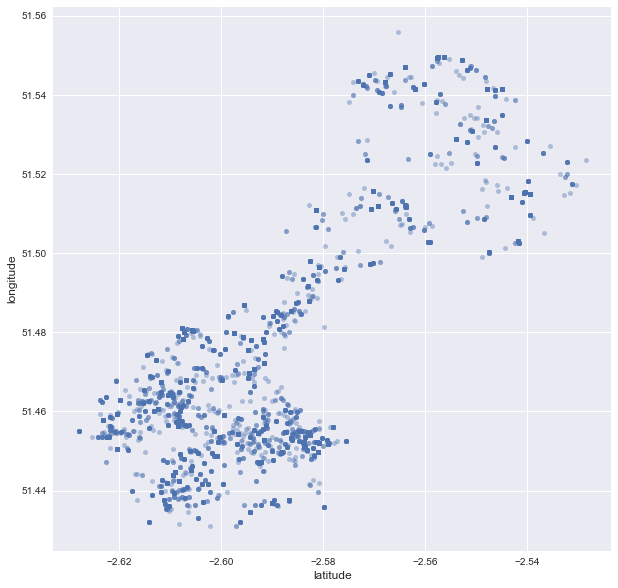

In [10]:
# Selecting the value for the clustetring

X = corridor_data.iloc[:, [2,3,6]].values
longitude = X[:,0].tolist()
latitude = X[:,1].tolist()
time_of_day = X[:,2].tolist()

print('Number of bookings on the corridor since 07.2016:',len(X))

#Ploting the points 

plt.figure(figsize = (10,10))
plt.plot(latitude,longitude,'.', alpha = 0.4, markersize = 10)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('longitude', fontsize=12)
plt.show()

## 4 Clustering

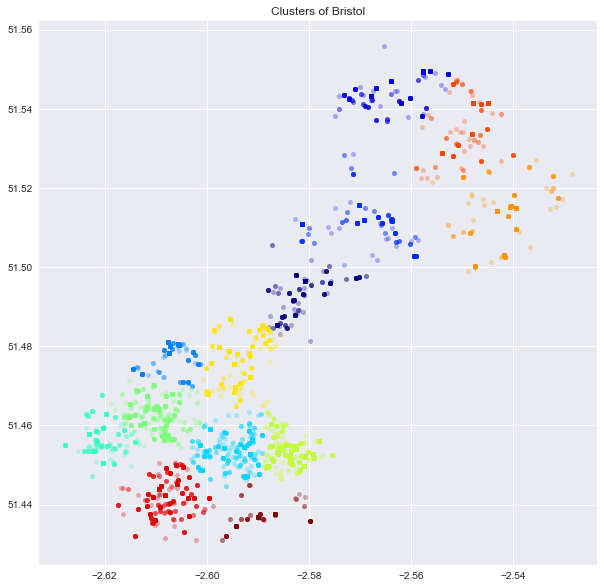

In [11]:
from matplotlib.pyplot import cm 

#creating pandas table
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude
loc_df['Time_day'] = time_of_day


#applying kmean algorithm to the data set
N = 13

kmeans = KMeans(n_clusters= N, init='k-means++',max_iter = 1000, n_init=10, random_state=0).fit(loc_df[['longitude','latitude']])
loc_df['label'] = kmeans.labels_

#visualisation
colors = plt.cm.jet(np.linspace(0,1,N))

plt.figure(figsize = (10,10))
for label,i in zip(loc_df.label.unique(),range(0,N)):
    plt.plot(loc_df.latitude[loc_df.label == label],loc_df.longitude[loc_df.label == label],'.', alpha = 0.3, markersize = 10,color=colors[i])
plt.title('Clusters of Bristol')
plt.show()

## 5 Centroids of the clusters

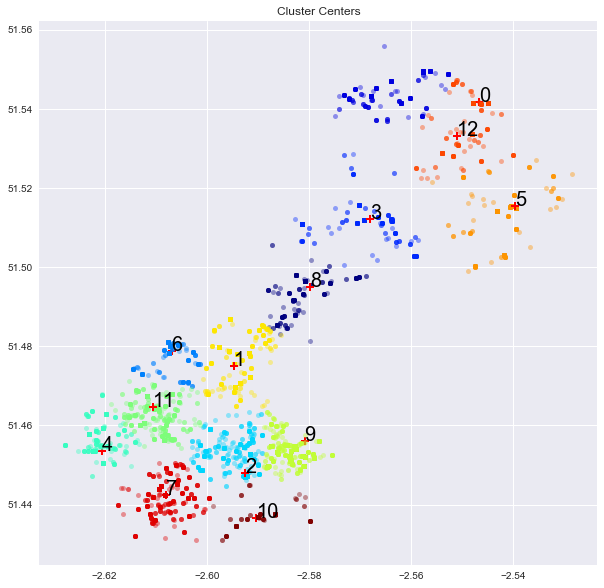

       latitude
label          
0           441
1           372
2          1201
3           649
4           304
5           358
6           488
7           379
8           165
9           654
10          366
11          792
12          648

list of centroids coordinates

[ 51.54168702  -2.54675119]
[ 51.4749554   -2.59468101]
[ 51.44795383  -2.59250652]
[ 51.51212228  -2.56801916]
[ 51.45350392  -2.62048035]
[ 51.51537371  -2.53968481]
[ 51.478886    -2.60689413]
[ 51.44251426  -2.60794243]
[ 51.49493175  -2.57980994]
[ 51.45616259  -2.58085853]
[ 51.43651909  -2.59028695]
[ 51.46467635  -2.61058654]
[ 51.53315481  -2.5509526 ]


In [15]:
#Plot cluster centroids & labels
plt.figure(figsize = (10,10))
for label,i in zip(loc_df.label.unique(),range(0,N)):
    plt.plot(loc_df.latitude[loc_df.label == label],loc_df.longitude[loc_df.label == label],'.', alpha = 0.4, markersize = 10,color=colors[i])
    plt.plot(kmeans.cluster_centers_[label,1],kmeans.cluster_centers_[label,0],'P', color = 'r',markersize= 8)
    plt.annotate(label, (kmeans.cluster_centers_[label,1],kmeans.cluster_centers_[label,0]), color = 'k', fontsize = 20)

plt.title('Cluster Centers')    
plt.show()

#centroids coordinates
centroid = []

for i in range(0,N):
    value = kmeans.cluster_centers_[i]
    centroid.append(value) 
    
G_all_day = loc_df[['latitude','label']].groupby('label').count()
print(G_all_day)


print('')
print('list of centroids coordinates')
print('')
for i in range(0,N):
    value = kmeans.cluster_centers_[i]
    centroid_AM_starting.append(value)
    print(value)




# 6. visualisation

In [17]:
from folium.plugins import MarkerCluster


## Selecting the value for the clustetring
X = corridor_data.iloc[:, [2,3]].values.tolist()
bris_coordinates = (51.4549518,-2.5836967)

#Treshold for the test - speed purpose
MAX_RECORDS = 1000

# Creation empty map zoomed in on Britol

map = folium.Map(location=bris_coordinates, zoom_start=12,tiles='Stamen Toner')


for i in centroid:
    folium.Marker(i,popup='AM starting', icon=folium.Icon(icon='cloud',color='green')).add_to(map)
map